In [42]:
cd C:\Users\hchoi30\Desktop\csc478

C:\Users\hchoi30\Desktop\csc478


In [43]:
cd

C:\Users\hchoi30


In [1]:
cd C:\Users\hchoi30\Desktop\csc478\newsgroups

C:\Users\hchoi30\Desktop\csc478\newsgroups


In [2]:
import numpy as np
import pandas as pd

In [3]:
train = np.genfromtxt("trainMatrixModified.txt",delimiter="\t")
train = train.T
train.shape

(800L, 5500L)

In [4]:
train_labels = np.genfromtxt("trainClasses.txt", delimiter="\t")
train_labels = train_labels[:,1]
train_labels.shape

(800L,)

In [5]:
test = np.genfromtxt("testMatrixModified.txt", delimiter="\t")
test = test.T
test.shape

(200L, 5500L)

In [6]:
test_labels = np.genfromtxt("testClasses.txt", delimiter='\t')
test_labels = test_labels[:,1]
test_labels.shape

(200L,)

In [7]:
# 1.a - create KNN Classifier

def KNNClassifier(training, labels, instance, k, measure):
    test_predict = []
    if measure =='Euclidean':
        trainingSize = train.shape[0]
        for i in range(0, instance.shape[0]):
            diff = np.tile(instance[i], (trainingSize,1)) - training
            sqdiff = diff**2
            sqdist =sqdiff.sum(axis =1)
            dist = sqdist**0.5  
            sorteddist = dist.argsort()
            final_dist = sorteddist[:k]
            pred_lb = labels[final_dist]
            if sum(pred_lb) <= np.floor(k/2):
                test_predict.append(0)
            else:
                test_predict.append(1)
                
    elif measure =="CosineSimilarity":
        train_norm = np.array([np.linalg.norm(train[i])for i in range(len(train))])
        for i in range(0, instance.shape[0]):
            instance_norm = np.linalg.norm(instance[i])
            cos = np.dot(train, instance[i])/(train_norm *instance_norm)
            dist = 1 - cos
            sorteddist = dist.argsort()
            final_dist = sorteddist[:k]
            pred_lb = labels[final_dist]
            if sum(pred_lb) <= np.floor(k/2):
                test_predict.append(0)
            else:
                test_predict.append(1)
        
    
    return test_predict

In [8]:
#Test the KNN Classifier function KNN=3, and method = Euclidean

import operator
result_euc = KNNClassifier(train, train_labels, test, 3,'Euclidean')
result_euc[:20]

[1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0]

In [9]:
#Test the KNN Classifier function KNN=3, and method = CosineSimilarity

result_cos = KNNClassifier(train, train_labels, test, 3,'CosineSimilarity')
result_cos[:20]

[1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0]

In [10]:
numTestVecs = len(test_labels)
print numTestVecs   

200


In [196]:
#1.b create the Accuracy1 function with Euclidean method 

def Accuracy1(k):
    errorCount = 0.0
    result_euc = KNNClassifier(train, train_labels, test, k ,'Euclidean')
    for i in range(numTestVecs):
    
        a=result_euc[i]
        b=test_labels[i]

        #print "the classifier came back with: %s, the real answer is: %s" % (a,b)
        if a != b: errorCount += 1.0
            

    print "The accuracy of Euclidean (k = %i) is: %f" % (k,(1- errorCount/float(numTestVecs)))

In [197]:
# test the accuracy1, KNN=3
Accuracy1(3)

The accuracy of Euclidean (k = 3) is: 0.810000


In [176]:
#1.b create the Accuracy2 function with CosineSimilarity method 

def Accuracy2(k):
    errorCount = 0.0
    result_cos = KNNClassifier(train, train_labels, test, k ,'CosineSimilarity')
    for i in range(numTestVecs):
    
        c=result_cos[i]
        b=test_labels[i]
        
        if b != c: errorCount += 1.0
            

    print "The accuracy of  CosineSimilarity (k = %i) is: %f" % (k, 1 - errorCount/float(numTestVecs))

In [177]:
Accuracy2(3)

The accuracy of  CosineSimilarity (k = 3) is: 0.970000


In [472]:
#1.c Run Accuracy Function K form 1 through 20

for i in range(1,21):
   
    accuracy_euc = Accuracy1(i)   
    accuracy_cos = Accuracy2(i)
    print "---------------------------"

The accuracy of Euclidean (k = 1) is: 0.780000
The accuracy of  CosineSimilarity (k = 1) is: 0.985000
---------------------------
The accuracy of Euclidean (k = 2) is: 0.785000
The accuracy of  CosineSimilarity (k = 2) is: 0.960000
---------------------------
The accuracy of Euclidean (k = 3) is: 0.810000
The accuracy of  CosineSimilarity (k = 3) is: 0.970000
---------------------------
The accuracy of Euclidean (k = 4) is: 0.770000
The accuracy of  CosineSimilarity (k = 4) is: 0.965000
---------------------------
The accuracy of Euclidean (k = 5) is: 0.815000
The accuracy of  CosineSimilarity (k = 5) is: 0.970000
---------------------------
The accuracy of Euclidean (k = 6) is: 0.745000
The accuracy of  CosineSimilarity (k = 6) is: 0.980000
---------------------------
The accuracy of Euclidean (k = 7) is: 0.765000
The accuracy of  CosineSimilarity (k = 7) is: 0.980000
---------------------------
The accuracy of Euclidean (k = 8) is: 0.730000
The accuracy of  CosineSimilarity (k = 8) i

In [474]:
#1.d 
DF_train = np.array([(train !=0).sum(0)]).T
DF_train[:10]
DF_train.shape

(5500L, 1L)

In [475]:
DF_test = np.array([(test !=0).sum(0)]).T
DF_test[:10]
#DF_test.shape

array([[ 15],
       [  0],
       [  1],
       [200],
       [ 26],
       [ 12],
       [ 13],
       [ 14],
       [  8],
       [ 47]])

In [476]:
NMatrix_train=np.ones(np.shape(train), dtype=float)*800
NMatrix_train=NMatrix_train.T
np.set_printoptions(precision=2,suppress=True,linewidth=120)
print NMatrix_train
NMatrix_train.shape

[[ 800.  800.  800. ...,  800.  800.  800.]
 [ 800.  800.  800. ...,  800.  800.  800.]
 [ 800.  800.  800. ...,  800.  800.  800.]
 ..., 
 [ 800.  800.  800. ...,  800.  800.  800.]
 [ 800.  800.  800. ...,  800.  800.  800.]
 [ 800.  800.  800. ...,  800.  800.  800.]]


(5500L, 800L)

In [477]:
NMatrix_test=np.ones(np.shape(test), dtype=float)*200
NMatrix_test=NMatrix_test.T
np.set_printoptions(precision=2,suppress=True,linewidth=120)
print NMatrix_test
NMatrix_test.shape

[[ 200.  200.  200. ...,  200.  200.  200.]
 [ 200.  200.  200. ...,  200.  200.  200.]
 [ 200.  200.  200. ...,  200.  200.  200.]
 ..., 
 [ 200.  200.  200. ...,  200.  200.  200.]
 [ 200.  200.  200. ...,  200.  200.  200.]
 [ 200.  200.  200. ...,  200.  200.  200.]]


(5500L, 200L)

In [478]:
IDF_train = np.log2(np.divide(NMatrix_train,DF_train))

In [479]:
print IDF_train[:10]

[[ 4.    4.    4.   ...,  4.    4.    4.  ]
 [ 6.84  6.84  6.84 ...,  6.84  6.84  6.84]
 [ 6.32  6.32  6.32 ...,  6.32  6.32  6.32]
 ..., 
 [ 4.09  4.09  4.09 ...,  4.09  4.09  4.09]
 [ 4.89  4.89  4.89 ...,  4.89  4.89  4.89]
 [ 2.01  2.01  2.01 ...,  2.01  2.01  2.01]]


In [480]:
IDF_test = np.log2(np.divide(NMatrix_test,DF_test))

In [481]:
print IDF_test[:10]

[[ 3.74  3.74  3.74 ...,  3.74  3.74  3.74]
 [  inf   inf   inf ...,   inf   inf   inf]
 [ 7.64  7.64  7.64 ...,  7.64  7.64  7.64]
 ..., 
 [ 3.84  3.84  3.84 ...,  3.84  3.84  3.84]
 [ 4.64  4.64  4.64 ...,  4.64  4.64  4.64]
 [ 2.09  2.09  2.09 ...,  2.09  2.09  2.09]]


In [482]:
# Finally compute the TFxIDF values for each document-term entry
train_tfidf = train.T * IDF_train
test_tfidf = test.T*IDF_test

In [483]:
print train_tfidf
train_tfidf.shape

test_tfidf[np.isnan(test_tfidf)] = 0
print test_tfidf
test_tfidf.shape

[[  8.     0.     0.   ...,   0.     0.     0.  ]
 [ 13.67   0.     0.   ...,   0.     0.     0.  ]
 [ 12.64   0.     0.   ...,   0.     0.     0.  ]
 ..., 
 [  0.     0.     0.   ...,   0.     0.     0.  ]
 [  0.     0.     0.   ...,   0.     0.     0.  ]
 [  0.     0.     0.   ...,   0.     0.     0.  ]]
[[ 0.    0.    3.74 ...,  0.    0.    0.  ]
 [ 0.    0.    0.   ...,  0.    0.    0.  ]
 [ 0.    0.    0.   ...,  0.    0.    0.  ]
 ..., 
 [ 0.    0.    0.   ...,  0.    0.    0.  ]
 [ 0.    0.    0.   ...,  0.    0.    0.  ]
 [ 0.    0.    0.   ...,  0.    0.    0.  ]]


(5500L, 200L)

In [485]:
import operator
train_tfidf=train_tfidf.T
#test_tfidf=test_tfidf.T

result_euc1 = KNNClassifier(train_tfidf, train_labels, test_tfidf, 5,'Euclidean')
result_euc1[:20]

[1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0]

In [486]:
result_cos1 = KNNClassifier(train_tfidf, train_labels, test_tfidf, 5,'CosineSimilarity')
result_cos1[:20]

[1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0]

In [487]:
errorCount_re = 0.0

for i in range(numTestVecs):
    
    re=result_euc1[i]
    b=test_labels[i]        
    if re != b: errorCount_re += 1.0
        
print "The Accuracy of Euclidean K=5 with TFxIDF is: %f" % (1 - errorCount_re/float(numTestVecs))

The Accuracy of Euclidean K=5 with TFxIDF is: 0.800000


In [488]:
errorCount_rc = 0.0

for i in range(numTestVecs):
    
    rc=result_cos1[i]
    b=test_labels[i]        
    if rc != b: errorCount_rc += 1.0
        
print "The Accuracy of CosineSimilarity K=5 with TFxIDF is: %f" % (1 - errorCount_rc/float(numTestVecs))

The Accuracy of CosineSimilarity K=5 with TFxIDF is: 0.980000


choose k=5 and compare the accuracy
test result from c which is KNN k=5 show the highest accuracy K from 1 throuhg 20

result of KNN
The accuracy of Euclidean (k = 5) is: 0.815000
The accuracy of  CosineSimilarity (k = 5) is: 0.970000

result of 
The Accuracy of Euclidean K=5 with TFxIDF is: 0.800000
The Accuracy of CosineSimilarity K=5 with TFxIDF is: 0.980000

Therfore, CosineSimilarity method shows high accuracy compare with Euclidean method



In [144]:
#1.e 
idx_zero = train_labels == 0
temp_zero = train_tfidf[idx_zero]
result_zero = np.sum(temp_zero, axis=0)
result_zero

array([ 228.  ,   27.35,   31.61, ...,    8.64,   17.29,   17.29])

In [145]:
idx_one = train_labels == 1
temp_one = train_tfidf[idx_one]
result_one = np.sum(temp_one, axis=0)
result_one

array([ 180.  ,   47.86,  107.47, ...,    8.64,    0.  ,    0.  ])

In [146]:
class1= 0.75*result_zero-0.25*result_one
class1

array([ 126.  ,    8.55,   -3.16, ...,    4.32,   12.97,   12.97])

In [147]:
class2= 0.75*result_one-0.25*result_zero
class2

array([ 78.  ,  29.06,  72.7 , ...,   4.32,  -4.32,  -4.32])

In [157]:
def Rocchio(instance):

    class1_norm = np.linalg.norm(class1)
    class2_norm = np.linalg.norm(class2)

    test_R_predict = []

    for i in range(0, instance.shape[0]):
        instance_norm = np.linalg.norm(instance[i])
        cos1 = np.dot(class1, instance[i])/(class1_norm *instance_norm)
        dist1 = 1 - cos1
        cos2 = np.dot(class2, instance[i])/(class2_norm *instance_norm)
        dist2 = 1 - cos2
    
        if dist1 < dist2:
            test_R_predict.append(0)
        else:

            test_R_predict.append(1) 

    return test_R_predict

In [172]:
result_R_cos = Rocchio(test_tfidf)
result_R_cos[:10]

[1, 0, 0, 1, 1, 0, 1, 1, 0, 1]

In [173]:
errorCount = 0.0

for i in range(numTestVecs):
    
    r=result_R_cos[i]
    b=test_labels[i]
      
    if r != b: errorCount += 1.0
            
print "The Accuracy of Rocchio method is: %f" % (1 - errorCount/float(numTestVecs))

The Accuracy is: 0.985000


In [426]:
cd C:\Users\hchoi30\Desktop\csc478

C:\Users\hchoi30\Desktop\csc478


In [427]:
#2.a
vs = np.genfromtxt("bank_data.csv", delimiter=",", names=True, dtype=( "|S10",int, float, int,"|S1", "|S10", "|S3", "|S3", "|S3", "|S3","|S3","|S3"))
vs[:5]

array([('ID12101', 48, 17546.0, 1, 'F', 'INNER_CITY', 'NO', 'NO', 'NO', 'NO', 'NO', 'YES'),
       ('ID12102', 40, 30085.1, 3, 'M', 'TOWN', 'YES', 'YES', 'NO', 'YES', 'YES', 'NO'),
       ('ID12103', 51, 16575.4, 0, 'F', 'INNER_CITY', 'YES', 'YES', 'YES', 'YES', 'NO', 'NO'),
       ('ID12104', 23, 20375.4, 3, 'F', 'TOWN', 'YES', 'NO', 'NO', 'YES', 'NO', 'NO'),
       ('ID12105', 57, 50576.3, 0, 'F', 'RURAL', 'YES', 'NO', 'YES', 'NO', 'NO', 'NO')], 
      dtype=[('id', 'S10'), ('age', '<i4'), ('income', '<f8'), ('children', '<i4'), ('gender', 'S1'), ('region', 'S10'), ('married', 'S3'), ('car', 'S3'), ('savings_acct', 'S3'), ('current_acct', 'S3'), ('mortgage', 'S3'), ('pep', 'S3')])

In [428]:
vs_records = vs[['age','income','children','gender','region','married','car','savings_acct','current_acct','mortgage']]
vs_records[:5]

array([(48, 17546.0, 1, 'F', 'INNER_CITY', 'NO', 'NO', 'NO', 'NO', 'NO'),
       (40, 30085.1, 3, 'M', 'TOWN', 'YES', 'YES', 'NO', 'YES', 'YES'),
       (51, 16575.4, 0, 'F', 'INNER_CITY', 'YES', 'YES', 'YES', 'YES', 'NO'),
       (23, 20375.4, 3, 'F', 'TOWN', 'YES', 'NO', 'NO', 'YES', 'NO'),
       (57, 50576.3, 0, 'F', 'RURAL', 'YES', 'NO', 'YES', 'NO', 'NO')], 
      dtype=[('age', '<i4'), ('income', '<f8'), ('children', '<i4'), ('gender', 'S1'), ('region', 'S10'), ('married', 'S3'), ('car', 'S3'), ('savings_acct', 'S3'), ('current_acct', 'S3'), ('mortgage', 'S3')])

In [429]:
#seperate target attribute 
vs_target = vs['pep']
vs_target[:5]

array(['YES', 'NO', 'NO', 'NO', 'NO'], 
      dtype='|S3')

In [430]:
vs_names = vs_records.dtype.names

In [431]:
vs_dict = [dict(zip(vs_names, record)) for record in vs_records] 

In [432]:
vs_dict[:1]

[{'age': 48,
  'car': 'NO',
  'children': 1,
  'current_acct': 'NO',
  'gender': 'F',
  'income': 17546.0,
  'married': 'NO',
  'mortgage': 'NO',
  'region': 'INNER_CITY',
  'savings_acct': 'NO'}]

In [433]:
from sklearn.feature_extraction import DictVectorizer

In [434]:
vs_vec = DictVectorizer()
vs_matrix = vs_vec.fit_transform(vs_dict).toarray()

In [435]:
vs_vec.get_feature_names()

['age',
 'car=NO',
 'car=YES',
 'children',
 'current_acct=NO',
 'current_acct=YES',
 'gender=F',
 'gender=M',
 'income',
 'married=NO',
 'married=YES',
 'mortgage=NO',
 'mortgage=YES',
 'region=INNER_CITY',
 'region=RURAL',
 'region=SUBURBAN',
 'region=TOWN',
 'savings_acct=NO',
 'savings_acct=YES']

In [436]:
np.set_printoptions(precision=2, linewidth=100, suppress=True)
print vs_matrix[0:5]

[[    48.       1.       0.       1.       1.       0.       1.       0.   17546.       1.       0.
       1.       0.       1.       0.       0.       0.       1.       0. ]
 [    40.       0.       1.       3.       0.       1.       0.       1.   30085.1      0.       1.
       0.       1.       0.       0.       0.       1.       1.       0. ]
 [    51.       0.       1.       0.       0.       1.       1.       0.   16575.4      0.       1.
       1.       0.       1.       0.       0.       0.       0.       1. ]
 [    23.       1.       0.       3.       0.       1.       1.       0.   20375.4      0.       1.
       1.       0.       0.       0.       0.       1.       1.       0. ]
 [    57.       1.       0.       0.       1.       0.       1.       0.   50576.3      0.       1.
       1.       0.       0.       1.       0.       0.       0.       1. ]]


In [437]:
len(vs_matrix)

600

In [438]:
from sklearn.cross_validation import train_test_split
vs_train, vs_test, vs_target_train, vs_target_test = train_test_split(vs_matrix, vs_target, test_size=0.2, random_state=33)

print vs_train.shape, vs_test.shape
print vs_test[0:5]

(480L, 19L) (120L, 19L)
[[    32.       0.       1.       0.       0.       1.       1.       0.   13267.6      0.       1.
       0.       1.       0.       0.       0.       1.       0.       1. ]
 [    59.       0.       1.       1.       0.       1.       1.       0.   29866.9      1.       0.
       1.       0.       1.       0.       0.       0.       1.       0. ]
 [    61.       1.       0.       3.       0.       1.       0.       1.   41609.5      0.       1.
       0.       1.       0.       1.       0.       0.       0.       1. ]
 [    53.       0.       1.       3.       1.       0.       0.       1.   48971.6      0.       1.
       1.       0.       0.       1.       0.       0.       0.       1. ]
 [    65.       0.       1.       1.       1.       0.       0.       1.   38080.9      0.       1.
       0.       1.       1.       0.       0.       0.       0.       1. ]]


In [439]:
from sklearn import preprocessing

In [440]:
# min_max normalization

min_max_scaler = preprocessing.MinMaxScaler().fit(vs_train)
vs_train_norm = min_max_scaler.transform(vs_train)
vs_test_norm = min_max_scaler.transform(vs_test)

In [441]:
vs_train_norm[0:5]

array([[ 0.57,  0.  ,  1.  ,  0.67,  0.  ,  1.  ,  1.  ,  0.  ,  0.46,  0.  ,  1.  ,  1.  ,  0.  ,
         1.  ,  0.  ,  0.  ,  0.  ,  0.  ,  1.  ],
       [ 0.8 ,  1.  ,  0.  ,  0.  ,  1.  ,  0.  ,  1.  ,  0.  ,  0.78,  0.  ,  1.  ,  1.  ,  0.  ,
         0.  ,  1.  ,  0.  ,  0.  ,  0.  ,  1.  ],
       [ 0.14,  1.  ,  0.  ,  0.  ,  0.  ,  1.  ,  1.  ,  0.  ,  0.16,  0.  ,  1.  ,  1.  ,  0.  ,
         1.  ,  0.  ,  0.  ,  0.  ,  0.  ,  1.  ],
       [ 0.35,  1.  ,  0.  ,  0.33,  0.  ,  1.  ,  0.  ,  1.  ,  0.18,  0.  ,  1.  ,  1.  ,  0.  ,
         1.  ,  0.  ,  0.  ,  0.  ,  0.  ,  1.  ],
       [ 0.33,  0.  ,  1.  ,  0.  ,  1.  ,  0.  ,  1.  ,  0.  ,  0.18,  0.  ,  1.  ,  0.  ,  1.  ,
         0.  ,  0.  ,  0.  ,  1.  ,  0.  ,  1.  ]])

In [442]:
vs_test_norm[0:5]

array([[ 0.29,  0.  ,  1.  ,  0.  ,  0.  ,  1.  ,  1.  ,  0.  ,  0.12,  0.  ,  1.  ,  0.  ,  1.  ,
         0.  ,  0.  ,  0.  ,  1.  ,  0.  ,  1.  ],
       [ 0.84,  0.  ,  1.  ,  0.33,  0.  ,  1.  ,  1.  ,  0.  ,  0.41,  1.  ,  0.  ,  1.  ,  0.  ,
         1.  ,  0.  ,  0.  ,  0.  ,  1.  ,  0.  ],
       [ 0.88,  1.  ,  0.  ,  1.  ,  0.  ,  1.  ,  0.  ,  1.  ,  0.62,  0.  ,  1.  ,  0.  ,  1.  ,
         0.  ,  1.  ,  0.  ,  0.  ,  0.  ,  1.  ],
       [ 0.71,  0.  ,  1.  ,  1.  ,  1.  ,  0.  ,  0.  ,  1.  ,  0.75,  0.  ,  1.  ,  1.  ,  0.  ,
         0.  ,  1.  ,  0.  ,  0.  ,  0.  ,  1.  ],
       [ 0.96,  0.  ,  1.  ,  0.33,  1.  ,  0.  ,  0.  ,  1.  ,  0.56,  0.  ,  1.  ,  0.  ,  1.  ,
         1.  ,  0.  ,  0.  ,  0.  ,  0.  ,  1.  ]])

In [443]:
#2.b KNN

from sklearn import neighbors, tree, naive_bayes

In [444]:
n_neighbors = 3
knnclf = neighbors.KNeighborsClassifier(n_neighbors, weights='distance')
knnclf.fit(vs_train_norm, vs_target_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=3, p=2,
           weights='distance')

In [445]:
knnpreds_test = knnclf.predict(vs_test_norm)

In [446]:
print knnpreds_test

['YES' 'YES' 'NO' 'NO' 'YES' 'YES' 'YES' 'NO' 'NO' 'YES' 'NO' 'NO' 'YES' 'NO' 'YES' 'NO' 'YES' 'YES'
 'YES' 'NO' 'NO' 'YES' 'NO' 'NO' 'YES' 'NO' 'YES' 'YES' 'NO' 'YES' 'NO' 'NO' 'NO' 'YES' 'NO' 'YES'
 'NO' 'YES' 'NO' 'NO' 'NO' 'NO' 'YES' 'NO' 'YES' 'NO' 'YES' 'YES' 'NO' 'YES' 'YES' 'YES' 'YES' 'NO'
 'YES' 'YES' 'YES' 'YES' 'NO' 'NO' 'YES' 'NO' 'YES' 'YES' 'NO' 'NO' 'NO' 'NO' 'NO' 'YES' 'YES' 'NO'
 'YES' 'NO' 'NO' 'NO' 'YES' 'YES' 'YES' 'NO' 'YES' 'YES' 'YES' 'YES' 'NO' 'NO' 'YES' 'NO' 'NO' 'YES'
 'YES' 'NO' 'NO' 'NO' 'NO' 'NO' 'YES' 'NO' 'NO' 'NO' 'NO' 'NO' 'YES' 'YES' 'NO' 'NO' 'NO' 'NO' 'YES'
 'YES' 'YES' 'NO' 'NO' 'YES' 'NO' 'YES' 'NO' 'NO' 'NO' 'NO']


In [447]:
from sklearn.metrics import classification_report

In [448]:
print(classification_report(vs_target_test, knnpreds_test))

             precision    recall  f1-score   support

         NO       0.68      0.67      0.67        66
        YES       0.60      0.61      0.61        54

avg / total       0.64      0.64      0.64       120



In [449]:
from sklearn.metrics import confusion_matrix

In [450]:
knncm = (confusion_matrix(vs_target_test, knnpreds_test))
print knncm

[[44 22]
 [21 33]]


In [451]:
print knnclf.score(vs_test_norm, vs_target_test)

0.641666666667


In [460]:
n_neighbors00 = 3
knnclf00 = neighbors.KNeighborsClassifier(n_neighbors00, weights='uniform')
knnclf00.fit(vs_train_norm, vs_target_train)
knnpreds_test00 = knnclf00.predict(vs_test_norm)
print knnpreds_test00

['YES' 'YES' 'NO' 'NO' 'YES' 'YES' 'YES' 'NO' 'NO' 'YES' 'NO' 'YES' 'YES' 'NO' 'YES' 'NO' 'YES'
 'YES' 'YES' 'NO' 'NO' 'YES' 'NO' 'NO' 'YES' 'NO' 'YES' 'YES' 'NO' 'YES' 'NO' 'NO' 'NO' 'YES' 'NO'
 'YES' 'NO' 'YES' 'NO' 'NO' 'NO' 'NO' 'YES' 'NO' 'YES' 'NO' 'YES' 'YES' 'NO' 'YES' 'YES' 'YES' 'YES'
 'NO' 'YES' 'YES' 'YES' 'YES' 'NO' 'NO' 'NO' 'NO' 'YES' 'YES' 'NO' 'NO' 'NO' 'NO' 'NO' 'YES' 'YES'
 'NO' 'YES' 'NO' 'NO' 'NO' 'NO' 'YES' 'YES' 'NO' 'YES' 'YES' 'YES' 'YES' 'NO' 'YES' 'YES' 'YES' 'NO'
 'YES' 'YES' 'NO' 'NO' 'NO' 'NO' 'NO' 'YES' 'NO' 'NO' 'NO' 'NO' 'NO' 'YES' 'YES' 'NO' 'NO' 'NO' 'NO'
 'YES' 'YES' 'YES' 'NO' 'NO' 'YES' 'NO' 'NO' 'NO' 'NO' 'NO' 'NO']


In [461]:
print(classification_report(vs_target_test, knnpreds_test00))

             precision    recall  f1-score   support

         NO       0.69      0.68      0.69        66
        YES       0.62      0.63      0.62        54

avg / total       0.66      0.66      0.66       120



In [452]:
n_neighbors1 = 5
knnclf1 = neighbors.KNeighborsClassifier(n_neighbors1, weights='distance')
knnclf1.fit(vs_train_norm, vs_target_train)
knnpreds_test1 = knnclf1.predict(vs_test_norm)
print knnpreds_test1

['YES' 'YES' 'YES' 'NO' 'YES' 'YES' 'YES' 'NO' 'NO' 'YES' 'NO' 'NO' 'YES' 'NO' 'YES' 'NO' 'YES' 'NO'
 'YES' 'NO' 'NO' 'YES' 'NO' 'NO' 'YES' 'NO' 'YES' 'YES' 'NO' 'YES' 'NO' 'NO' 'NO' 'YES' 'NO' 'YES'
 'NO' 'YES' 'NO' 'NO' 'NO' 'NO' 'YES' 'NO' 'YES' 'NO' 'YES' 'NO' 'NO' 'YES' 'YES' 'YES' 'YES' 'NO'
 'YES' 'YES' 'YES' 'YES' 'NO' 'NO' 'YES' 'NO' 'YES' 'YES' 'NO' 'NO' 'NO' 'NO' 'NO' 'YES' 'YES' 'NO'
 'YES' 'NO' 'NO' 'NO' 'NO' 'YES' 'YES' 'NO' 'YES' 'YES' 'YES' 'YES' 'NO' 'NO' 'YES' 'NO' 'NO' 'YES'
 'NO' 'NO' 'NO' 'NO' 'NO' 'NO' 'NO' 'NO' 'NO' 'NO' 'NO' 'NO' 'NO' 'YES' 'NO' 'NO' 'NO' 'NO' 'YES'
 'NO' 'YES' 'NO' 'NO' 'YES' 'NO' 'YES' 'NO' 'NO' 'NO' 'NO']


In [453]:
print(classification_report(vs_target_test, knnpreds_test1))

             precision    recall  f1-score   support

         NO       0.68      0.73      0.70        66
        YES       0.63      0.57      0.60        54

avg / total       0.66      0.66      0.66       120



In [454]:
n_neighbors1 = 5
knnclf11 = neighbors.KNeighborsClassifier(n_neighbors1, weights='uniform')
knnclf11.fit(vs_train_norm, vs_target_train)
knnpreds_test11 = knnclf11.predict(vs_test_norm)
print knnpreds_test11

['YES' 'YES' 'YES' 'NO' 'YES' 'YES' 'YES' 'NO' 'NO' 'YES' 'NO' 'YES' 'NO' 'NO' 'NO' 'NO' 'YES' 'NO'
 'YES' 'NO' 'NO' 'YES' 'NO' 'NO' 'YES' 'NO' 'YES' 'YES' 'YES' 'YES' 'NO' 'NO' 'NO' 'YES' 'NO' 'YES'
 'NO' 'YES' 'NO' 'YES' 'NO' 'NO' 'YES' 'NO' 'YES' 'NO' 'YES' 'NO' 'NO' 'YES' 'YES' 'YES' 'YES' 'NO'
 'YES' 'YES' 'YES' 'NO' 'NO' 'NO' 'NO' 'NO' 'YES' 'YES' 'NO' 'NO' 'NO' 'NO' 'NO' 'YES' 'YES' 'YES'
 'YES' 'NO' 'NO' 'NO' 'NO' 'YES' 'YES' 'NO' 'YES' 'YES' 'YES' 'YES' 'NO' 'YES' 'YES' 'YES' 'NO'
 'YES' 'NO' 'NO' 'NO' 'NO' 'NO' 'NO' 'NO' 'NO' 'NO' 'NO' 'NO' 'NO' 'NO' 'YES' 'NO' 'NO' 'NO' 'NO'
 'YES' 'NO' 'YES' 'NO' 'NO' 'YES' 'NO' 'NO' 'NO' 'NO' 'NO' 'NO']


In [455]:
print(classification_report(vs_target_test, knnpreds_test11))

             precision    recall  f1-score   support

         NO       0.69      0.73      0.71        66
        YES       0.64      0.59      0.62        54

avg / total       0.67      0.67      0.67       120



In [456]:
print knnclf1.score(vs_test_norm, vs_target_test)

0.658333333333


In [457]:
n_neighbors2 = 7
knnclf2 = neighbors.KNeighborsClassifier(n_neighbors2, weights='distance')
knnclf2.fit(vs_train_norm, vs_target_train)
knnpreds_test2 = knnclf2.predict(vs_test_norm)
print knnpreds_test2

['YES' 'YES' 'NO' 'NO' 'YES' 'YES' 'YES' 'NO' 'NO' 'YES' 'NO' 'YES' 'YES' 'NO' 'YES' 'NO' 'YES' 'NO'
 'YES' 'NO' 'NO' 'YES' 'NO' 'NO' 'YES' 'NO' 'YES' 'YES' 'NO' 'YES' 'NO' 'YES' 'NO' 'YES' 'NO' 'YES'
 'NO' 'YES' 'NO' 'NO' 'NO' 'NO' 'YES' 'NO' 'YES' 'NO' 'YES' 'NO' 'NO' 'YES' 'NO' 'YES' 'YES' 'NO'
 'YES' 'YES' 'YES' 'YES' 'NO' 'NO' 'YES' 'NO' 'YES' 'YES' 'NO' 'NO' 'NO' 'NO' 'NO' 'YES' 'NO' 'YES'
 'YES' 'NO' 'NO' 'NO' 'NO' 'YES' 'YES' 'NO' 'YES' 'YES' 'NO' 'YES' 'NO' 'NO' 'YES' 'NO' 'NO' 'YES'
 'NO' 'NO' 'NO' 'NO' 'NO' 'NO' 'YES' 'NO' 'NO' 'NO' 'NO' 'NO' 'NO' 'NO' 'NO' 'NO' 'NO' 'NO' 'YES'
 'NO' 'YES' 'NO' 'NO' 'YES' 'NO' 'YES' 'NO' 'NO' 'NO' 'NO']


In [458]:
print(classification_report(vs_target_test, knnpreds_test2))

             precision    recall  f1-score   support

         NO       0.67      0.73      0.70        66
        YES       0.62      0.56      0.59        54

avg / total       0.65      0.65      0.65       120



In [462]:
print knnclf2.score(vs_test_norm, vs_target_test)

0.65


In [463]:
n_neighbors2 = 7
knnclf22 = neighbors.KNeighborsClassifier(n_neighbors2, weights='uniform')
knnclf22.fit(vs_train_norm, vs_target_train)
knnpreds_test22 = knnclf22.predict(vs_test_norm)
print knnpreds_test22

['YES' 'YES' 'NO' 'NO' 'YES' 'YES' 'YES' 'NO' 'NO' 'YES' 'NO' 'YES' 'YES' 'NO' 'YES' 'YES' 'YES'
 'NO' 'YES' 'YES' 'NO' 'YES' 'NO' 'NO' 'YES' 'NO' 'YES' 'YES' 'YES' 'YES' 'NO' 'YES' 'NO' 'YES' 'NO'
 'YES' 'NO' 'YES' 'NO' 'NO' 'NO' 'NO' 'YES' 'NO' 'YES' 'NO' 'YES' 'NO' 'NO' 'YES' 'NO' 'YES' 'YES'
 'YES' 'YES' 'YES' 'YES' 'NO' 'NO' 'NO' 'NO' 'NO' 'YES' 'YES' 'NO' 'NO' 'NO' 'NO' 'NO' 'YES' 'NO'
 'YES' 'NO' 'YES' 'NO' 'YES' 'NO' 'YES' 'YES' 'NO' 'YES' 'YES' 'NO' 'NO' 'NO' 'NO' 'YES' 'NO' 'NO'
 'YES' 'NO' 'NO' 'NO' 'NO' 'NO' 'NO' 'YES' 'NO' 'NO' 'NO' 'NO' 'NO' 'NO' 'NO' 'NO' 'NO' 'NO' 'NO'
 'YES' 'NO' 'YES' 'NO' 'NO' 'YES' 'NO' 'NO' 'NO' 'NO' 'YES' 'NO']


In [464]:
print(classification_report(vs_target_test, knnpreds_test22))

             precision    recall  f1-score   support

         NO       0.67      0.71      0.69        66
        YES       0.62      0.57      0.60        54

avg / total       0.65      0.65      0.65       120



In [465]:
print knnclf22.score(vs_test_norm, vs_target_test)

0.65


KNN with K=5 and Uniform method will increase accuracy.

In [283]:
#2. c
treeclf = tree.DecisionTreeClassifier(criterion='entropy', min_samples_split=3)

In [284]:
treeclf = treeclf.fit(vs_train, vs_target_train)

In [285]:
treepreds_test = treeclf.predict(vs_test)
print treepreds_test

['NO' 'YES' 'NO' 'YES' 'YES' 'NO' 'YES' 'NO' 'YES' 'NO' 'YES' 'NO' 'NO' 'NO' 'NO' 'NO' 'NO' 'NO'
 'YES' 'NO' 'YES' 'NO' 'NO' 'NO' 'YES' 'NO' 'NO' 'YES' 'YES' 'YES' 'NO' 'NO' 'NO' 'YES' 'YES' 'YES'
 'NO' 'YES' 'NO' 'YES' 'YES' 'NO' 'NO' 'NO' 'YES' 'NO' 'NO' 'YES' 'NO' 'YES' 'YES' 'YES' 'YES' 'YES'
 'NO' 'YES' 'YES' 'YES' 'NO' 'NO' 'YES' 'NO' 'YES' 'YES' 'YES' 'YES' 'NO' 'NO' 'YES' 'YES' 'NO' 'NO'
 'NO' 'YES' 'NO' 'NO' 'NO' 'NO' 'YES' 'NO' 'NO' 'YES' 'YES' 'NO' 'NO' 'YES' 'NO' 'NO' 'YES' 'YES'
 'NO' 'NO' 'NO' 'NO' 'YES' 'NO' 'NO' 'NO' 'NO' 'NO' 'NO' 'NO' 'YES' 'YES' 'NO' 'YES' 'YES' 'NO'
 'YES' 'NO' 'YES' 'NO' 'NO' 'YES' 'NO' 'NO' 'NO' 'NO' 'NO' 'NO']


In [286]:
print treeclf.score(vs_test, vs_target_test)

0.8


In [85]:
print treeclf.score(vs_train, vs_target_train)

0.9875


In [287]:
print(classification_report(vs_target_test, treepreds_test))

             precision    recall  f1-score   support

         NO       0.80      0.85      0.82        66
        YES       0.80      0.74      0.77        54

avg / total       0.80      0.80      0.80       120



In [288]:
treecm = confusion_matrix(vs_target_test, treepreds_test)
print treecm

[[56 10]
 [14 40]]


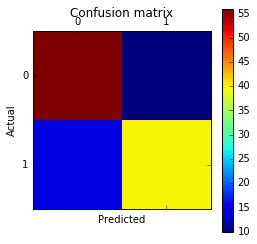

In [289]:
import pylab as plt
%matplotlib inline
plt.matshow(treecm)
plt.title('Confusion matrix')
plt.colorbar()
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

In [290]:
# 2.c Naive Bayes
nbclf = naive_bayes.GaussianNB()
nbclf = nbclf.fit(vs_train, vs_target_train)
nbpreds_test = nbclf.predict(vs_test)
print nbpreds_test

['NO' 'YES' 'NO' 'YES' 'YES' 'NO' 'NO' 'NO' 'NO' 'YES' 'NO' 'YES' 'NO' 'NO' 'NO' 'NO' 'YES' 'NO'
 'YES' 'NO' 'YES' 'YES' 'NO' 'NO' 'NO' 'NO' 'YES' 'YES' 'NO' 'YES' 'YES' 'NO' 'NO' 'NO' 'NO' 'NO'
 'YES' 'YES' 'NO' 'NO' 'NO' 'NO' 'YES' 'NO' 'YES' 'NO' 'NO' 'NO' 'NO' 'NO' 'YES' 'YES' 'NO' 'NO'
 'YES' 'YES' 'YES' 'NO' 'NO' 'NO' 'YES' 'NO' 'YES' 'NO' 'NO' 'NO' 'NO' 'NO' 'NO' 'YES' 'NO' 'NO'
 'NO' 'NO' 'NO' 'NO' 'NO' 'YES' 'YES' 'NO' 'NO' 'YES' 'NO' 'NO' 'YES' 'NO' 'NO' 'NO' 'YES' 'NO' 'NO'
 'YES' 'NO' 'NO' 'YES' 'NO' 'NO' 'YES' 'NO' 'NO' 'NO' 'YES' 'NO' 'YES' 'NO' 'NO' 'YES' 'NO' 'YES'
 'NO' 'NO' 'NO' 'YES' 'YES' 'NO' 'NO' 'NO' 'NO' 'NO' 'NO']


In [291]:
print nbclf.score(vs_train, vs_target_train)

0.65625


In [292]:
print nbclf.score(vs_test, vs_target_test)

0.591666666667


In [295]:
nbclfcm = confusion_matrix(vs_target_test, nbpreds_test)
print nbclfcm

[[49 17]
 [32 22]]


In [293]:
print(classification_report(vs_target_test, nbpreds_test))

             precision    recall  f1-score   support

         NO       0.60      0.74      0.67        66
        YES       0.56      0.41      0.47        54

avg / total       0.59      0.59      0.58       120



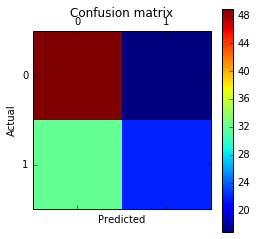

In [296]:
plt.matshow(nbclfcm)
plt.title('Confusion matrix')
plt.colorbar()
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

#2.c.For each model, compare the average accuracry scores on the test and the training data sets. What does the comparison tell you in terms of bias-variance trade-off?

accuracy of decision tree split with 3 are 0.8(test), 0.99(train)
accuracy of naive bayes are 0.59(test), 0.66(train)
the accuracy of decision tree is more higer that naive bayes both test and training data set.


#2.d. Discuss your observations based on the above experiments. 

method	    k=3	    k=5	    k=7
distance	0.64	0.66	0.65
uniform	    0.66	0.67	0.65

with KNN method k=5 with unifoem weight parameter shows best accuray which is 0.67

however all over the all method decision tree is the most accurate method in this data set. 

In [2]:
cd C:\Users\hchoi30\Desktop\csc478

C:\Users\hchoi30\Desktop\csc478


In [3]:
#3 Data Analysis and Predictive Modeling on Census data
import numpy as np
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt

In [4]:
#a. preprocessing and data analysis

vstable3 = pd.read_csv("adult-modified.csv", na_values=["?"])

vstable3.shape

(10000, 8)

In [5]:
vstable3.head()

,age,workclass,education,marital,race,sex,hours-per-week,income
0,39.0,Public,13,Single,White,Male,40,<=50K
1,50.0,Self-emp,13,Married,White,Male,13,<=50K
2,38.0,Private,9,Single,White,Male,40,<=50K
3,53.0,Private,7,Married,Black,Male,40,<=50K
4,28.0,Private,13,Married,Black,Female,40,<=50K


In [6]:
vstable3.describe(include="all")

,age,workclass,education,marital,race,sex,hours-per-week,income
count,9802.000000,9412,10000.000000,10000,10000,10000,10000.000000,10000
unique,NaN,3,NaN,2,5,2,NaN,2
top,NaN,Private,NaN,Single,White,Male,NaN,<=50K
freq,NaN,6947,NaN,5017,8556,6703,NaN,7621
mean,38.449806,NaN,10.076600,NaN,NaN,NaN,40.530300,NaN
std,13.611949,NaN,2.548172,NaN,NaN,NaN,12.277197,NaN
min,17.000000,NaN,1.000000,NaN,NaN,NaN,1.000000,NaN
25%,27.000000,NaN,9.000000,NaN,NaN,NaN,40.000000,NaN
50%,37.000000,NaN,10.000000,NaN,NaN,NaN,40.000000,NaN
75%,47.000000,NaN,12.000000,NaN,NaN,NaN,45.000000,NaN


In [7]:
#3.a.firstdot - examamine missing value 

vstable3[vstable3.age.isnull()]

,age,workclass,education,marital,race,sex,hours-per-week,income
19,NaN,Self-emp,14,Single,White,Female,45,>50K
27,NaN,NaN,10,Married,Asian,Male,60,>50K
40,NaN,Private,5,Married,White,Male,43,<=50K
65,NaN,Private,9,Married,White,Male,40,<=50K
80,NaN,Private,9,Single,White,Male,30,<=50K
89,NaN,Public,16,Single,White,Female,50,>50K
95,NaN,Public,10,Single,White,Male,50,<=50K
113,NaN,Private,10,Married,White,Female,25,<=50K
132,NaN,Self-emp,9,Married,White,Male,35,<=50K
147,NaN,Private,9,Married,White,Female,24,<=50K


In [8]:
vstable3[vstable3.workclass.isnull()]

,age,workclass,education,marital,race,sex,hours-per-week,income
27,NaN,NaN,10,Married,Asian,Male,60,>50K
61,32.0,NaN,4,Married,White,Male,40,<=50K
69,25.0,NaN,10,Single,White,Male,40,<=50K
77,67.0,NaN,6,Married,White,Male,2,<=50K
106,17.0,NaN,6,Single,White,Female,32,<=50K
128,35.0,NaN,9,Married,White,Male,40,<=50K
149,43.0,NaN,10,Single,White,Female,40,<=50K
154,52.0,NaN,9,Single,White,Male,45,>50K
160,68.0,NaN,2,Single,White,Female,20,<=50K
187,53.0,NaN,13,Single,White,Female,50,<=50K


In [9]:
age_mean = vstable3.age.mean()
vstable3.age.fillna(age_mean, axis=0, inplace=True)

In [10]:
vstable3.dropna(axis=0, inplace=True)
vstable3.shape

(9412, 8)

In [11]:
vstable3.head(5)

,age,workclass,education,marital,race,sex,hours-per-week,income
0,39.0,Public,13,Single,White,Male,40,<=50K
1,50.0,Self-emp,13,Married,White,Male,13,<=50K
2,38.0,Private,9,Single,White,Male,40,<=50K
3,53.0,Private,7,Married,Black,Male,40,<=50K
4,28.0,Private,13,Married,Black,Female,40,<=50K


In [12]:
#3.a.2nd dot - examin the characteristics of the attribute
vstable3.describe()

,age,education,hours-per-week
count,9412.000000,9412.000000,9412.000000
mean,38.366342,10.125266,41.080217
std,12.962039,2.542118,11.884590
min,17.000000,1.000000,1.000000
25%,28.000000,9.000000,40.000000
50%,37.000000,10.000000,40.000000
75%,47.000000,13.000000,45.000000
max,90.000000,16.000000,99.000000


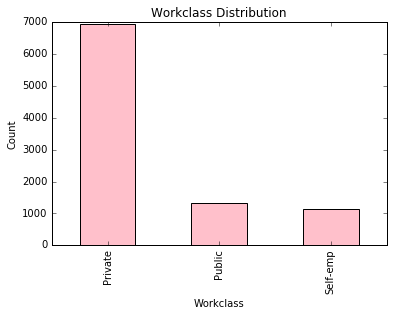

In [13]:
workclass_ratio = vstable3["workclass"].value_counts()
workclass_ratio.plot(kind='bar', color ="pink")
plt.xlabel("Workclass")
plt.ylabel("Count")
plt.title("Workclass Distribution")
plt.show()

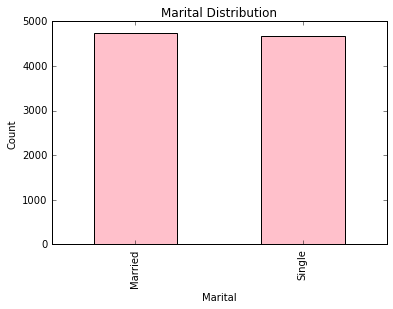

In [14]:
marital_ratio = vstable3["marital"].value_counts()
marital_ratio.plot(kind='bar', title = "Marital Distribution", color = "pink")
plt.xlabel("Marital")
plt.ylabel("Count")

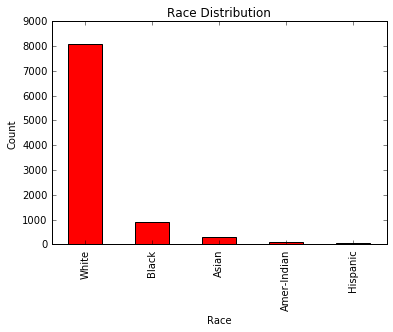

In [15]:
race_ratio = vstable3["race"].value_counts() 
race_ratio.plot(kind='bar', title = "Race Distribution", color = "red")
plt.xlabel("Race")
plt.ylabel("Count")

Male      6383
Female    3029
Name: sex, dtype: int64


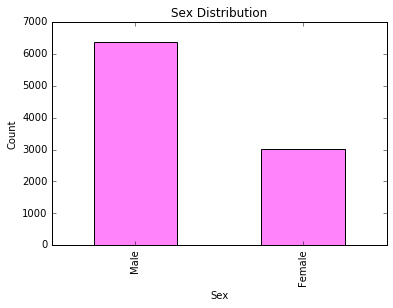

In [16]:
sex_ratio = vstable3["sex"].value_counts()
print sex_ratio 
sex_ratio.plot(kind='bar', title = "Sex Distribution", color = "#FF83FA")
plt.xlabel("Sex")
plt.ylabel("Count")

<=50K    7093
>50K     2319
Name: income, dtype: int64


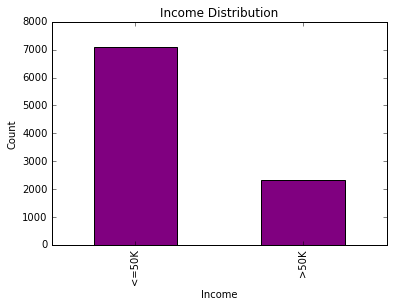

In [17]:
income_ratio = vstable3["income"].value_counts()
print income_ratio 
income_ratio.plot(kind='bar', title = "Income Distribution", color = "purple")
plt.xlabel("Income")
plt.ylabel("Count")

In [18]:
#3.a.3rd dot - cross tabulations
gger= pd.crosstab(vstable3["education"], vstable3["race"])
gger

race,Amer-Indian,Asian,Black,Hispanic,White
education,,,,,
1,0,0,1,0,11
2,0,1,4,3,38
3,0,4,5,1,71
4,5,5,14,6,150
5,0,3,19,2,118
6,8,3,30,4,223
7,4,6,49,4,261
8,0,2,17,3,78
9,35,67,350,23,2590


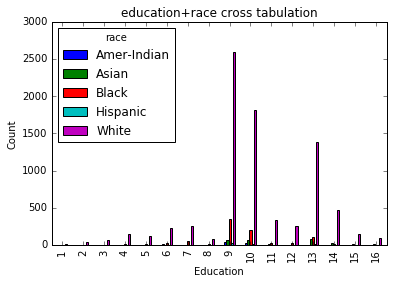

In [19]:
gger.plot(kind="bar", title = "education+race cross tabulation",)
plt.xlabel("Education")
plt.ylabel("Count")
plt.show()

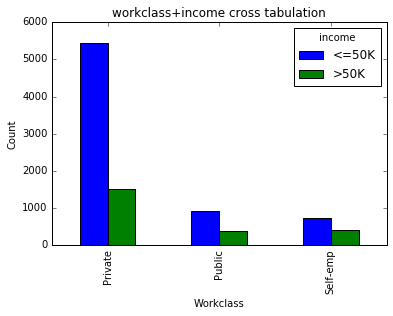

In [20]:
ggwi= pd.crosstab(vstable3["workclass"], vstable3["income"])
ggwi.plot(kind="bar", title = "workclass+income cross tabulation",)
plt.xlabel("Workclass")
plt.ylabel("Count")
plt.show()

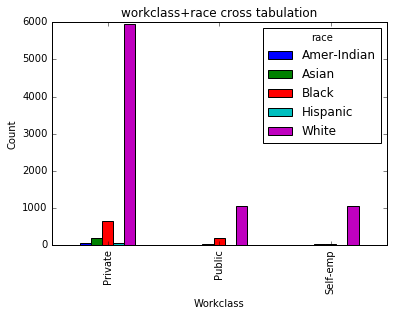

In [21]:
ggwr= pd.crosstab(vstable3["workclass"], vstable3["race"])
ggwr.plot(kind="bar", title = "workclass+race cross tabulation",)
plt.xlabel("Workclass")
plt.ylabel("Count")
plt.show()

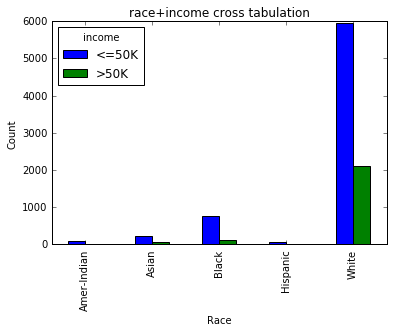

In [22]:
ggri= pd.crosstab(vstable3["race"], vstable3["income"])
ggri.plot(kind="bar", title = "race+income cross tabulation",)
plt.xlabel("Race")
plt.ylabel("Count")
plt.show()

In [23]:
vstable3.groupby(["race","income"])["income"].count()

race         income
Amer-Indian  <=50K       83
             >50K         9
Asian        <=50K      224
             >50K        67
Black        <=50K      773
             >50K       119
Hispanic     <=50K       69
             >50K         6
White        <=50K     5944
             >50K      2118
Name: income, dtype: int64

In [24]:
ggri2 = pd.crosstab(vstable3["race"], vstable3["income"])
ggri2

income,<=50K,>50K
race,,
Amer-Indian,83,9
Asian,224,67
Black,773,119
Hispanic,69,6
White,5944,2118


White          0.838009
Black          0.108981
Asian          0.031580
Amer-Indian    0.011702
Hispanic       0.009728
Name: race, dtype: float64


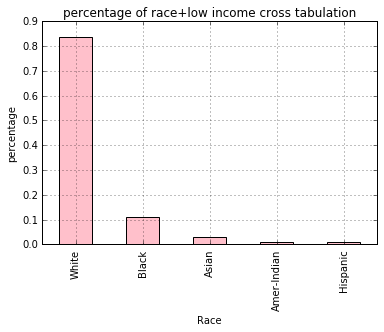

In [25]:
low_income = vstable3[vstable3.income =='<=50K']

race_low_income = low_income['race'].value_counts() / low_income['race'].count()
print race_low_income
race_low_income.plot(kind='bar', color = 'pink',grid=True, title = "percentage of race+low income cross tabulation")

plt.xlabel("Race")
plt.ylabel("percentage")
plt.show()

In [26]:
#3.a.4th dot

low_income = vstable3[vstable3.income =='<=50K']
high_income = vstable3[vstable3.income =='>50K']

print "Low Income:\n", low_income.describe()

print "\n High Income:\n", high_income.describe()

print "\n All Customer:\n", vstable3.describe()

Low Income:
               age    education  hours-per-week
count  7093.000000  7093.000000     7093.000000
mean     36.644604     9.646976       39.567038
std      13.340142     2.397358       11.868506
min      17.000000     1.000000        1.000000
25%      26.000000     9.000000       38.000000
50%      35.000000     9.000000       40.000000
75%      45.000000    10.000000       40.000000
max      90.000000    16.000000       99.000000

 High Income:
               age    education  hours-per-week
count  2319.000000  2319.000000     2319.000000
mean     43.632531    11.588185       45.708495
std      10.042135     2.410764       10.678794
min      19.000000     2.000000        1.000000
25%      36.000000     9.000000       40.000000
50%      43.000000    12.000000       40.000000
75%      50.000000    13.000000       50.000000
max      90.000000    16.000000       99.000000

 All Customer:
               age    education  hours-per-week
count  9412.000000  9412.000000     9412.0000

Private     0.767376
Public      0.130410
Self-emp    0.102213
Name: workclass, dtype: float64


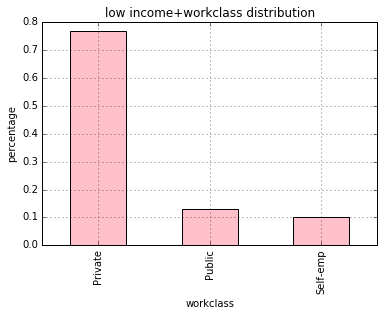

In [28]:
workclass_low_income = low_income['workclass'].value_counts() / low_income['workclass'].count()
print workclass_low_income
workclass_low_income.plot(kind='bar', color = 'pink',grid=True,title = "low income+workclass distribution")
plt.xlabel("workclass")
plt.ylabel("percentage")

Private     0.648555
Self-emp    0.182406
Public      0.169038
Name: workclass, dtype: float64


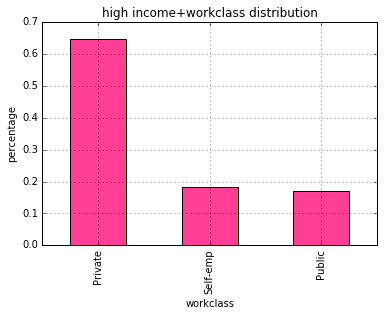

In [29]:
workclass_high_income = high_income['workclass'].value_counts() / high_income['workclass'].count()
print workclass_high_income
workclass_high_income.plot(kind='bar', color = '#FF3E96', grid=True, title = "high income+workclass distribution")
plt.xlabel("workclass")
plt.ylabel("percentage")

Single     0.615113
Married    0.384887
Name: marital, dtype: float64


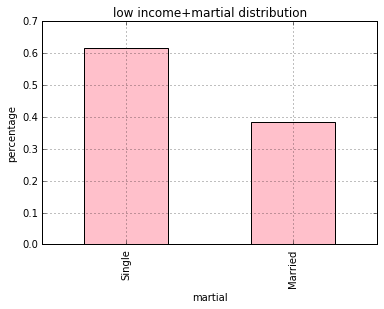

In [30]:
marital_low_income = low_income['marital'].value_counts() / low_income['marital'].count()
print marital_low_income
marital_low_income.plot(kind='bar', color = 'pink',grid=True, title = "low income+martial distribution")
plt.xlabel("martial")
plt.ylabel("percentage")

Married    0.865459
Single     0.134541
Name: marital, dtype: float64


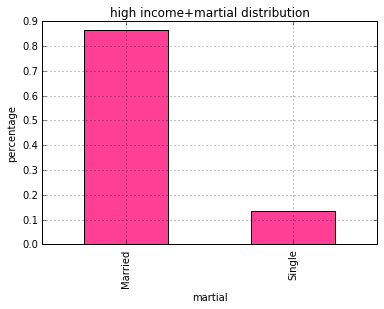

In [32]:
marital_high_income = high_income['marital'].value_counts() / high_income['marital'].count()
print marital_high_income
marital_high_income.plot(kind='bar', color = '#FF3E96', grid=True, title = "high income+martial distribution")
plt.xlabel("martial")
plt.ylabel("percentage")

White          0.838009
Black          0.108981
Asian          0.031580
Amer-Indian    0.011702
Hispanic       0.009728
Name: race, dtype: float64


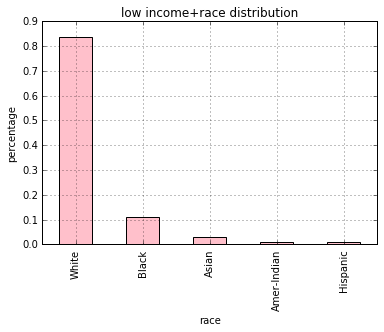

In [33]:
race_low_income = low_income['race'].value_counts() / low_income['race'].count()
print race_low_income
race_low_income.plot(kind='bar', color = 'pink',grid=True, title = "low income+race distribution")
plt.xlabel("race")
plt.ylabel("percentage")

White          0.913325
Black          0.051315
Asian          0.028892
Amer-Indian    0.003881
Hispanic       0.002587
Name: race, dtype: float64


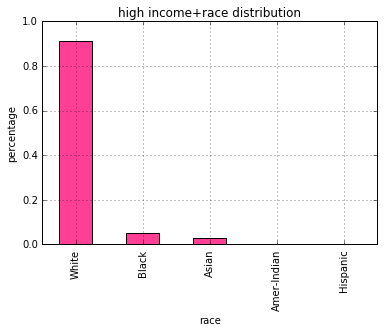

In [34]:
race_high_income = high_income['race'].value_counts() / high_income['race'].count()
print race_high_income
race_high_income.plot(kind='bar', color = '#FF3E96', grid=True,title = "high income+race distribution")
plt.xlabel("race")
plt.ylabel("percentage")

Male      0.623714
Female    0.376286
Name: sex, dtype: float64


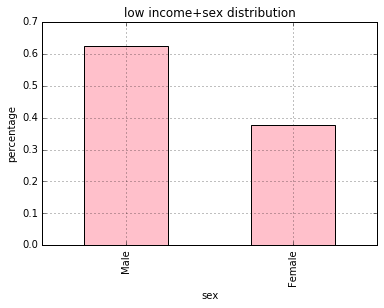

In [35]:
sex_low_income = low_income['sex'].value_counts() / low_income['sex'].count()
print sex_low_income
sex_low_income.plot(kind='bar', color = 'pink',grid=True, title = "low income+sex distribution")
plt.xlabel("sex")
plt.ylabel("percentage")

Male      0.844761
Female    0.155239
Name: sex, dtype: float64


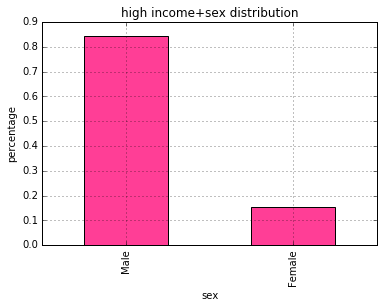

In [36]:
sex_high_income = high_income['sex'].value_counts() / high_income['sex'].count()
print sex_high_income
sex_high_income.plot(kind='bar', color = '#FF3E96', grid=True, title = "high income+sex distribution")
plt.xlabel("sex")
plt.ylabel("percentage")

In [353]:
#3.b. predictive modeling and model evaluation

vs3 = pd.get_dummies(vstable3[['age','workclass','education','marital','race','sex','hours-per-week','income']])

In [354]:
# seperate the target attribute "income_<=50K"
vs3_target = vs3['income_<=50K']

In [355]:
vs3 = pd.get_dummies(vstable3[['age','workclass','education','marital','race','sex','hours-per-week']])
vs3[:10]

,age,education,hours-per-week,workclass_Private,workclass_Public,workclass_Self-emp,marital_Married,marital_Single,race_Amer-Indian,race_Asian,race_Black,race_Hispanic,race_White,sex_Female,sex_Male
0,39.0,13,40,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0
1,50.0,13,13,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0
2,38.0,9,40,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0
3,53.0,7,40,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
4,28.0,13,40,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
5,37.0,14,40,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0
6,49.0,5,16,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
7,52.0,9,45,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0
8,31.0,14,50,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0
9,42.0,13,40,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0


In [356]:
vs3_matrix =np.array(vs3)
vs3_matrix.shape

(9412L, 15L)

In [357]:
from sklearn.cross_validation import train_test_split
vs3_train, vs3_test, vs3_target_train, vs3_target_test = train_test_split(vs3_matrix, vs3_target, test_size=0.2, random_state=33)

print vs3_train.shape, vs3_test.shape
print vs3_test[0:5]

(7529L, 15L) (1883L, 15L)
[[ 56.  10.  45.   1.   0.   0.   1.   0.   0.   0.   0.   0.   1.   0.   1.]
 [ 54.   9.  45.   1.   0.   0.   1.   0.   0.   0.   0.   0.   1.   0.   1.]
 [ 52.  11.  35.   1.   0.   0.   0.   1.   0.   0.   0.   0.   1.   1.   0.]
 [ 42.  16.  60.   0.   0.   1.   1.   0.   0.   0.   0.   0.   1.   0.   1.]
 [ 30.   9.  50.   0.   0.   1.   1.   0.   0.   0.   0.   0.   1.   0.   1.]]


In [358]:
from sklearn import preprocessing

In [359]:
min_max_scaler = preprocessing.MinMaxScaler().fit(vs3_train)
vs_train_norm = min_max_scaler.transform(vs3_train)
vs_test_norm = min_max_scaler.transform(vs3_test)

In [360]:
from sklearn import tree, naive_bayes

In [361]:
from sklearn.metrics import classification_report

In [362]:
from sklearn.metrics import confusion_matrix

In [363]:
# Decision tree classifier
treeclf3 = tree.DecisionTreeClassifier(criterion='entropy', min_samples_split=3)

In [364]:
treeclf3 = treeclf.fit(vs3_train, vs3_target_train)

In [365]:
treepreds3_test = treeclf3.predict(vs3_test)
print treepreds3_test

[ 0.  0.  1. ...,  1.  1.  0.]


In [366]:
print treeclf3.score(vs3_test, vs3_target_test)

0.761019649495


In [367]:
print treeclf3.score(vs3_train, vs3_target_train)

0.929871164829


In [368]:
print(classification_report(vs3_target_test, treepreds3_test))

             precision    recall  f1-score   support

        0.0       0.49      0.58      0.53       440
        1.0       0.86      0.82      0.84      1443

avg / total       0.78      0.76      0.77      1883



In [369]:
treecm3 = confusion_matrix(vs3_target_test, treepreds3_test)
print treecm3

[[ 254  186]
 [ 264 1179]]


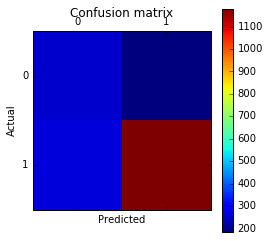

In [371]:
plt.matshow(treecm3)
plt.title('Confusion matrix')
plt.colorbar()
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

In [382]:
from sklearn import cross_validation

In [383]:
#Naive Bayes classifier

In [384]:
nbclf3 = naive_bayes.GaussianNB()
nbclf3 = nbclf.fit(vs3_train, vs3_target_train)
nbpreds3_test = nbclf3.predict(vs3_test)
print nbpreds3_test

[ 0.  0.  1. ...,  0.  1.  0.]


In [385]:
print nbclf3.score(vs3_train, vs3_target_train)

0.720547217426


In [386]:
print nbclf3.score(vs3_test, vs3_target_test)

0.719065321296


In [387]:
cv3_scores_nb = cross_validation.cross_val_score(nbclf3, vs3_matrix, vs3_target, cv=10)
cv3_scores_nb

array([ 0.73,  0.7 ,  0.73,  0.7 ,  0.73,  0.71,  0.71,  0.72,  0.73,  0.71])

In [388]:
print("Overall Accuracy: %0.2f (+/- %0.2f)" % (cv3_scores_nb.mean(), cv3_scores_nb.std()))

Overall Accuracy: 0.72 (+/- 0.01)


In [389]:
#cross-validation decision tree 
cv3_scores_tree = cross_validation.cross_val_score(treeclf3, vs3_matrix, vs3_target, cv=10)
cv3_scores_tree

array([ 0.76,  0.74,  0.76,  0.77,  0.77,  0.75,  0.75,  0.79,  0.77,  0.75])

In [390]:
print("Overall Accuracy: %0.2f (+/- %0.2f)" % (cv3_scores_tree.mean(), cv3_scores_tree.std()))

Overall Accuracy: 0.76 (+/- 0.02)


In [391]:
from sklearn.lda import LDA

ldclf3 = LDA()
ldclf3 = ldclf3.fit(vs3_train, vs3_target_train)
ldpreds3_test = ldclf3.predict(vs3_test)
print ldpreds3_test

[ 0.  1.  1. ...,  1.  1.  0.]


In [392]:
print ldclf3.score(vs3_matrix, vs3_target)

0.807267318317


In [393]:
cv3_scores_lda = cross_validation.cross_val_score(ldclf3, vs3_matrix, vs3_target, cv=10)
cv3_scores_lda

array([ 0.81,  0.81,  0.79,  0.82,  0.81,  0.79,  0.8 ,  0.81,  0.82,  0.82])

In [394]:
print("Overall Accuracy: %0.2f (+/- %0.2f)" % (cv3_scores_lda.mean(), cv3_scores_lda.std()))

Overall Accuracy: 0.81 (+/- 0.01)


In [466]:
# extra credit Visualizing the decision tree
from sklearn import tree
from StringIO import StringIO

In [467]:
tree.export_graphviz(treeclf3,out_file='tree.dot', feature_names=
['age', 'education','hours-per-week','workclass_Private','workclass_Public','workclass_Self-emp','marital_Married',
 'marital_Single','race_Amer-Indian','race_Asian','race_Black','race_Hispanic','race_White','sex_Female','sex_Male'])

In [468]:
cd C:\Users\hchoi30\Desktop\csc478

C:\Users\hchoi30\Desktop\csc478


In [471]:
from IPython.display import Image
Image(filename='tree.png')

IOError: [Errno 2] No such file or directory: u'tree.png'